# AMROPick Python Module Demo Usage

This Notebook contains information about the usage of the python module.

Please, make sure that you have installed the module to your local virtual environment.

This can be done with the following commands executed from the root folder of the GitHub repository:
```
conda activate amropick
cd amropick-vision
pip install -e .
```

### Import the module

In [1]:
import amropick

### Create a new instance of the Vision class

The class constructor have the following parameters:
- paths to the pretrained detect and classify models,
- list of the class names for each of the object in the same order as in the dataset,
- list of the z_offsets (or the heights) of each object to be accounted into the pick positions,
- list of colors for each object for the processed image.

In [2]:
apv = amropick.Vision(detect_model_path="./models/yolov8n-detect-custom.pt",
                      classify_model_path="./models/yolov8n-classify-custom.pt",
                      class_names=["Plate1", "Plate3"],
                      z_offsets=[0.002, 0.002],
                      class_colors=[(255, 0, 0), (0, 0, 255)])

### Load an image

The image can be loaded from file:

In [3]:
apv.load_image_from_file("./predict/image_009_Plate3.jpg")

The image can also be loaded directly from OpenCV image:

In [10]:
import cv2

image = cv2.imread("./predict/image_009_Plate3.jpg")
apv.load_image_from_cv2(image)

### Process the image

In [11]:
apv.process_image()


0: 480x640 2 Plates, 70.7ms
Speed: 5.5ms preprocess, 70.7ms inference, 7.6ms postprocess per image at shape (1, 3, 480, 640)

0: 640x640 Plate3 1.00, Plate1 0.00, 32.4ms
Speed: 22.2ms preprocess, 32.4ms inference, 0.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 Plate1 1.00, Plate3 0.00, 51.3ms
Speed: 19.1ms preprocess, 51.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)


### Get a list of all detected objects

In [12]:
apv.get_detected_objects()

[{'name': 'Plate3',
  'confidence': array(          1, dtype=float32),
  'x': 0.12033694344163658,
  'y': -0.06289156626506023,
  'z': 0.002,
  'theta': -0.6168012911097475},
 {'name': 'Plate1',
  'confidence': array(    0.99997, dtype=float32),
  'x': 0.06787003610108304,
  'y': 0.1491566265060241,
  'z': 0.002,
  'theta': 1.345337952533021}]

### Get the best found object for a specific class

In [13]:
apv.get_object("Plate1")

{'name': 'Plate1',
 'confidence': array(    0.99997, dtype=float32),
 'x': 0.06787003610108304,
 'y': 0.1491566265060241,
 'z': 0.002,
 'theta': 1.345337952533021}

The function will return None, if no object from the class was detected.

In [14]:
print(apv.get_object("Plate11"))

None


### Get the processed image

In [24]:
processed_image = apv.get_processed_image()

You can use it in OpenCV or show it with PyPlot.

<Figure size 640x480 with 0 Axes>

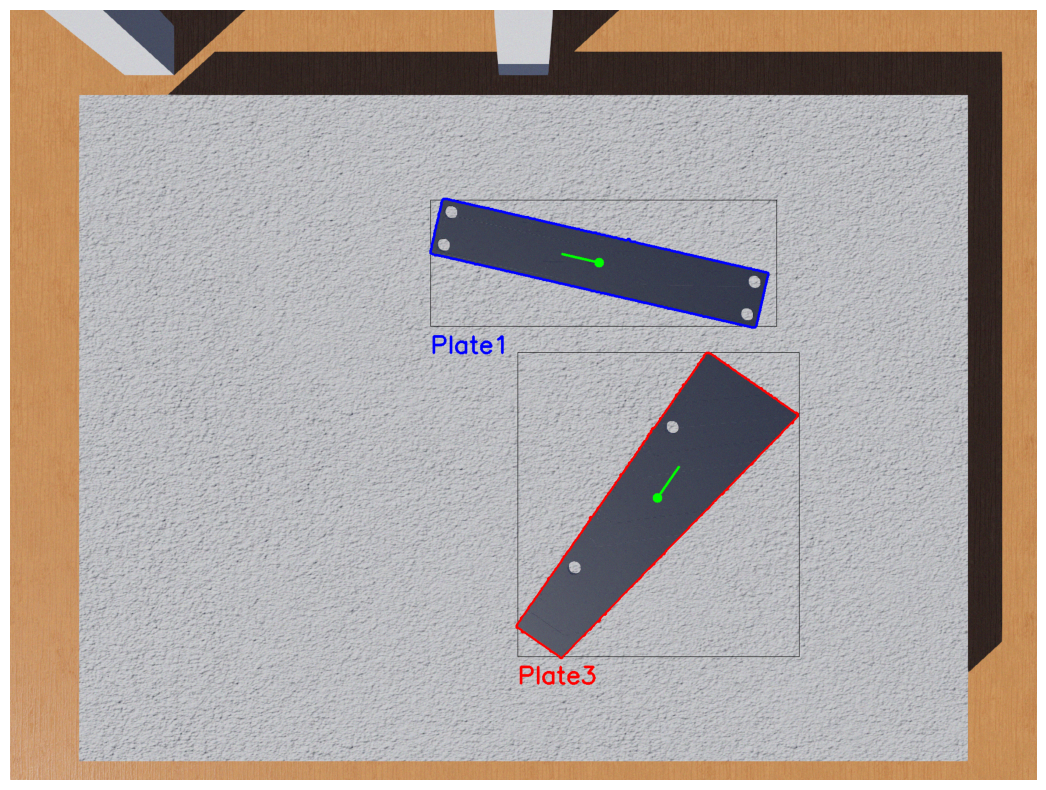

In [26]:
import cv2
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(40,10))
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()